In [1]:
# just a simple COVNET example in torch, based on: 
# https://www.cs.toronto.edu/~lczhang/321/tut/tut04.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
%matplotlib inline

In [3]:
# load the training data
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F95F89EA6A0>, 5)


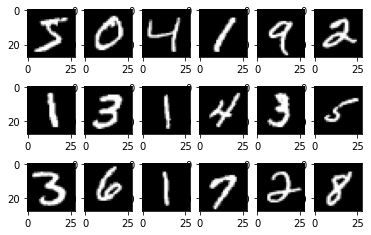

In [4]:
# Let’s take a look at some of the data:
# plot the first 18 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image, cmap='gray')

In [5]:

# transform the image data type to a 28x28 matrix of numbers
img_to_tensor = transforms.ToTensor()

# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [6]:
#If we want to convert the entire dataset into these tensor representations (as opposed to PIL.Image objects), there is
# a transform parameter that we can use when loading the MNIST dataset:

mnist_train = datasets.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [7]:
# train test split...
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

In [8]:
example_model = nn.Linear(50, 1) # assume 50 features, 1 linear output
#The example_model object contains weights and biases of the model. By default, PyTorch initializes these values to
#a random number close to 0:
weight, bias = list(example_model.parameters())
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[-0.0318,  0.0312, -0.0125,  0.0977, -0.0757, -0.0807,  0.0595, -0.0451,
          0.0490, -0.0275,  0.0597,  0.0566, -0.0092, -0.1263,  0.0878, -0.0056,
         -0.0410, -0.0714,  0.0462, -0.0016,  0.0659, -0.0348, -0.0224,  0.0596,
          0.0067, -0.0553,  0.0794, -0.0687,  0.0873,  0.0302, -0.1078,  0.0998,
          0.0555,  0.0479, -0.1363, -0.0495, -0.0124,  0.1093,  0.0619, -0.0430,
          0.0169, -0.0770,  0.0971,  0.0396,  0.0175,  0.0256,  0.1371, -0.0161,
         -0.0053,  0.0288]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([-0.0348], requires_grad=True)
torch.Size([1])


In [9]:
#If we create a new model, those initial parameters will change:
example_model = nn.Linear(50, 1)
weight, bias = list(example_model.parameters())
# These values should be different from above
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[-0.0211, -0.0545, -0.0338,  0.0921, -0.1195,  0.1306,  0.1069, -0.1211,
         -0.0262,  0.1241, -0.0418, -0.0126, -0.1221, -0.0989, -0.1027,  0.0423,
         -0.1178, -0.1366, -0.0955, -0.1063, -0.1382,  0.0157, -0.1088,  0.1009,
         -0.0504, -0.0449, -0.1296,  0.1198,  0.0287, -0.0953, -0.0613,  0.1403,
          0.0451,  0.1283,  0.0415,  0.1162,  0.0568,  0.0170, -0.0119,  0.1123,
          0.0446,  0.0288, -0.0117, -0.0750, -0.0057, -0.0373,  0.0627, -0.0263,
          0.0635, -0.0784]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([-0.0734], requires_grad=True)
torch.Size([1])


In [10]:
#Now, let’s create the actual model that we will train to solve the MNIST digit classification problem. How many
#input features do we have? How many output features do we need?
model = nn.Linear(784, 10) # 784 = 28*28
# Let's verify that the shapes of the weights and biases are what we expect
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [11]:
x = torch.randn(50) # create a rank 1 tensor (vector) with 50 features
x.shape

torch.Size([50])

In [12]:
y = example_model(x)
y.shape

torch.Size([1])

In [13]:
#If this model was used for binary classification, we might also need to apply the sigmoid function:
bclass = torch.sigmoid(example_model(x))
bclass

tensor([0.3396], grad_fn=<SigmoidBackward0>)

In [14]:
# One nice thing about PyTorch is that it vectorizes and parallelizes the computation for us. 
# So, if we had a batch of 32 inputs that we want to make predictions for, we can perform 
#  that computation using a single call:
x = torch.randn([32, 50]) # a stack of 32 inputs
print(x.shape)
y = example_model(x)
print(y.shape)

torch.Size([32, 50])
torch.Size([32, 1])


In [15]:
img_tensor.shape

torch.Size([1, 28, 28])

In [16]:
# We need to flatten the image into either a rank 1 tensor (with shape [784]) 
#  or a rank 2 tensor (with shape [1, 784]). We’ll choose the latter, so that the transition to
# passing multiple images at the same time is easier:
x = img_tensor.view(1, 784)
print(x.shape)
z = model(x)
print(z)
print(z.shape)
y = torch.softmax(z, dim=1)
print(y)
#The dim=1 in the softmax tells PyTorch which dimension represents different images, and which one represents the
# different class labels. We want our outputs y to be a probability distribution across the classes, 
# and not the different images.

torch.Size([1, 784])
tensor([[ 0.0631, -0.4327,  0.0184, -0.1521,  0.1619,  0.1047,  0.1588,  0.1218,
         -0.1216,  0.1258]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])
tensor([[0.1044, 0.0636, 0.0999, 0.0842, 0.1153, 0.1089, 0.1149, 0.1107, 0.0868,
         0.1112]], grad_fn=<SoftmaxBackward0>)


In [17]:
criterion = nn.CrossEntropyLoss()

In [18]:
loss = criterion(y, torch.Tensor([8]).long()) # digit 8 = the 8-th class
print(loss)

tensor(2.3159, grad_fn=<NllLossBackward0>)


In [19]:
def get_accuracy(model, data):
    loader = torch.utils.data.DataLoader(data, batch_size=500)
    correct, total = 0, 0
    for xs, ts in loader:
        xs = xs.view(-1, 784) # flatten the image
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(ts.view_as(pred)).sum().item()
        total += int(ts.shape[0])
    return correct / total

In [1]:
def run_gradient_descent(model,
                        batch_size=64,
                        learning_rate=0.01,
                        weight_decay=0,
                        num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    iters, losses = [], []
    iters_sub, train_acc, val_acc = [], [] ,[]
    train_loader = torch.utils.data.DataLoader(
        mnist_train,
        batch_size=batch_size,
        shuffle=True)

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for xs, ts in iter(train_loader):
#            if len(ts) != batch_size:
#                continue
            xs = xs.view(-1, 784) # flatten the image. The -1 is a wildcard
            zs = model(xs)
#            loss = criterion(zs, ts) # compute the total loss
#            loss.backward() # compute updates for each parameter
#            optimizer.step() # make the updates for each parameter
#            optimizer.zero_grad() # a clean up step for PyTorch
            
            # save the current training information
#            iters.append(n)
#            losses.append(float(loss)/batch_size) # compute *average* loss
            
#            if n % 10 == 0:
#                iters_sub.append(n)
#                train_acc.append(get_accuracy(model, mnist_train))
#                val_acc.append(get_accuracy(model, mnist_val))
            # increment the iteration number
            n += 1
            
    return model
        

In [2]:
model = nn.Linear(784, 10)
tmodel = run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)

NameError: name 'nn' is not defined

In [20]:
def plot():
        # plotting
        plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
        plt.plot(iters, losses, label="Train")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()
        plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
        plt.plot(iters_sub, train_acc, label="Train")
        plt.plot(iters_sub, val_acc, label="Validation")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend(loc='best')
        plt.show()